In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from matplotlib import rc

In [3]:
#power_data_west = pd.read_csv("west_interval_data_01-29-2019_01-27-2021.csv")
power_data_west = pd.read_csv("westdata_augmented.csv")

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
power_data_west.head(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
5,5,5,west,2019-01-29 01:15:00,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
6,6,6,west,2019-01-29 01:30:00,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
7,7,7,west,2019-01-29 01:45:00,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
8,8,8,west,2019-01-29 02:00:00,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4,2019-01-29 02,682,1548756000,2019-01-29 10,22,62.98,2019-01-29 02
9,9,9,west,2019-01-29 02:15:00,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4,2019-01-29 02,682,1548756000,2019-01-29 10,22,62.98,2019-01-29 02


In [5]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [6]:
plot_df_west = pd.DataFrame(power_data_west, columns=['demand', 'temp', 'end', 'humidity'])

In [7]:
plot_df_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [8]:
plot_df_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [9]:
power_data_west['month'] = power_data_west['end'].dt.strftime('%b')

In [10]:
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
power_data_west['month_int'] = power_data_west['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [11]:
power_data_west['day_of_week'] = power_data_west['end'].dt.day_name()

In [12]:
power_data_west['day_of_week_int'] = power_data_west['end'].dt.strftime("%w")

In [13]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['end'].dt.date.astype('datetime64').isin(holidays)

In [14]:
power_data_west.head(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,...,dt,dt_iso,humidity,humidity_temp,pt_date,month,month_int,day_of_week,day_of_week_int,holiday
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,...,1548748800,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,2,False
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,...,1548748800,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,2,False
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,...,1548748800,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,2,False
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,...,1548748800,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,2,False
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,...,1548752400,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,2,False
5,5,5,west,2019-01-29 01:15:00,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4,...,1548752400,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,2,False
6,6,6,west,2019-01-29 01:30:00,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4,...,1548752400,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,2,False
7,7,7,west,2019-01-29 01:45:00,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2,...,1548752400,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,2,False
8,8,8,west,2019-01-29 02:00:00,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4,...,1548756000,2019-01-29 10,22,62.98,2019-01-29 02,Jan,1,Tuesday,2,False
9,9,9,west,2019-01-29 02:15:00,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4,...,1548756000,2019-01-29 10,22,62.98,2019-01-29 02,Jan,1,Tuesday,2,False


In [15]:
power_data_west.tail(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,...,dt,dt_iso,humidity,humidity_temp,pt_date,month,month_int,day_of_week,day_of_week_int,holiday
104598,104598,104598,west,2022-01-25 13:30:00,2022-01-25 13:45:00,301.6,NaN,66.0,NaN,1206.4,...,1643144400,2022-01-25 21,37,68.23,2022-01-25 13,Jan,1,Tuesday,2,False
104599,104599,104599,west,2022-01-25 13:45:00,2022-01-25 14:00:00,300.0,NaN,66.0,NaN,1200.0,...,1643144400,2022-01-25 21,37,68.23,2022-01-25 13,Jan,1,Tuesday,2,False
104600,104600,104600,west,2022-01-25 14:00:00,2022-01-25 14:15:00,300.8,NaN,67.0,NaN,1203.2,...,1643148000,2022-01-25 22,27,69.22,2022-01-25 14,Jan,1,Tuesday,2,False
104601,104601,104601,west,2022-01-25 14:15:00,2022-01-25 14:30:00,309.6,NaN,67.0,NaN,1238.4,...,1643148000,2022-01-25 22,27,69.22,2022-01-25 14,Jan,1,Tuesday,2,False
104602,104602,104602,west,2022-01-25 14:30:00,2022-01-25 14:45:00,297.6,NaN,67.0,NaN,1190.4,...,1643148000,2022-01-25 22,27,69.22,2022-01-25 14,Jan,1,Tuesday,2,False
104603,104603,104603,west,2022-01-25 14:45:00,2022-01-25 15:00:00,297.6,NaN,67.0,NaN,1190.4,...,1643148000,2022-01-25 22,27,69.22,2022-01-25 14,Jan,1,Tuesday,2,False
104604,104604,104604,west,2022-01-25 15:00:00,2022-01-25 15:15:00,295.2,NaN,67.0,NaN,1180.8,...,1643151600,2022-01-25 23,26,68.34,2022-01-25 15,Jan,1,Tuesday,2,False
104605,104605,104605,west,2022-01-25 15:15:00,2022-01-25 15:30:00,304.8,NaN,67.0,NaN,1219.2,...,1643151600,2022-01-25 23,26,68.34,2022-01-25 15,Jan,1,Tuesday,2,False
104606,104606,104606,west,2022-01-25 15:30:00,2022-01-25 15:45:00,309.6,NaN,67.0,NaN,1238.4,...,1643151600,2022-01-25 23,26,68.34,2022-01-25 15,Jan,1,Tuesday,2,False
104607,104607,104607,west,2022-01-25 15:45:00,2022-01-25 16:00:00,296.8,NaN,67.0,NaN,1187.2,...,1643151600,2022-01-25 23,26,68.34,2022-01-25 15,Jan,1,Tuesday,2,False


In [16]:
power_data_west.describe()

,Unnamed: 0,index_x,usage,cost,temp,demand,index_y,dt,humidity,humidity_temp,month_int
count,104608.000000,104608.000000,104596.000000,0.0,104588.00000,104596.000000,104608.000000,1.046080e+05,104608.000000,104608.000000,104608.00000
mean,52303.500000,52303.500000,309.658615,NaN,67.39232,1238.634456,13764.530284,1.595853e+09,52.635401,68.527903,6.54298
std,30197.872817,30197.872817,75.599852,NaN,16.59371,302.399419,7560.847033,2.721905e+07,22.815913,15.741494,3.43464
min,0.000000,0.000000,0.000000,NaN,29.00000,0.000000,680.000000,1.548749e+09,3.000000,32.200000,1.00000
25%,26151.750000,26151.750000,252.000000,NaN,54.00000,1008.000000,7217.750000,1.572285e+09,34.000000,55.850000,4.00000
50%,52303.500000,52303.500000,308.000000,NaN,66.00000,1232.000000,13755.500000,1.595821e+09,49.000000,66.900000,7.00000
75%,78455.250000,78455.250000,368.000000,NaN,79.00000,1472.000000,20317.250000,1.619443e+09,70.000000,80.550000,10.00000
max,104607.000000,104607.000000,531.200000,NaN,114.00000,2124.800000,26903.000000,1.643152e+09,100.000000,110.680000,12.00000


In [17]:
power_data_west.shape

(104608, 22)

In [18]:
power_data_west.dtypes

Unnamed: 0                  int64
index_x                     int64
service                    object
start                      object
end                datetime64[ns]
usage                     float64
cost                      float64
temp                      float64
event_flag                 object
demand                    float64
sfm                        object
index_y                     int64
dt                          int64
dt_iso                     object
humidity                    int64
humidity_temp             float64
pt_date                    object
month                      object
month_int                    Int8
day_of_week                object
day_of_week_int            object
holiday                      bool
dtype: object

In [19]:
power_data_west.fillna(method='ffill',inplace=True)
power_data_west.isna().sum()

Unnamed: 0              0
index_x                 0
service                 0
start                   0
end                     0
usage                   0
cost               104608
temp                    0
event_flag           3840
demand                  0
sfm                     0
index_y                 0
dt                      0
dt_iso                  0
humidity                0
humidity_temp           0
pt_date                 0
month                   0
month_int               0
day_of_week             0
day_of_week_int         0
holiday                 0
dtype: int64

In [20]:
zero_usage_df = power_data_west.loc[power_data_west['demand'] == 0]
zero_usage_df.count()

Unnamed: 0         50
index_x            50
service            50
start              50
end                50
usage              50
cost                0
temp               50
event_flag         50
demand             50
sfm                50
index_y            50
dt                 50
dt_iso             50
humidity           50
humidity_temp      50
pt_date            50
month              50
month_int          50
day_of_week        50
day_of_week_int    50
holiday            50
dtype: int64

In [21]:
power_data_west = power_data_west[power_data_west['demand'] != 0]
zero_usage_df = power_data_west.loc[power_data_west['demand'] == 0]
zero_usage_df.count()

Unnamed: 0         0
index_x            0
service            0
start              0
end                0
usage              0
cost               0
temp               0
event_flag         0
demand             0
sfm                0
index_y            0
dt                 0
dt_iso             0
humidity           0
humidity_temp      0
pt_date            0
month              0
month_int          0
day_of_week        0
day_of_week_int    0
holiday            0
dtype: int64

In [22]:
linear_data = power_data_west[(power_data_west['end'] > '2019-01-01') & (power_data_west['end'] < '2022-02-01')]

In [23]:
linear_data["holiday_int"] = linear_data["holiday"].astype(int)

In [24]:
linear_data.head(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,...,dt_iso,humidity,humidity_temp,pt_date,month,month_int,day_of_week,day_of_week_int,holiday,holiday_int
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,...,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,2,False,0
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,...,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,2,False,0
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,...,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,2,False,0
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,...,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,2,False,0
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,...,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,2,False,0
5,5,5,west,2019-01-29 01:15:00,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4,...,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,2,False,0
6,6,6,west,2019-01-29 01:30:00,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4,...,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,2,False,0
7,7,7,west,2019-01-29 01:45:00,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2,...,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,2,False,0
8,8,8,west,2019-01-29 02:00:00,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4,...,2019-01-29 10,22,62.98,2019-01-29 02,Jan,1,Tuesday,2,False,0
9,9,9,west,2019-01-29 02:15:00,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4,...,2019-01-29 10,22,62.98,2019-01-29 02,Jan,1,Tuesday,2,False,0


In [25]:
linear_data_mod = linear_data[['demand', 'temp', 'humidity', 'month_int', 'day_of_week_int', 'holiday_int']].copy() 

In [26]:
linear_data_mod.head(10)

,demand,temp,humidity,month_int,day_of_week_int,holiday_int
0,844.8,54.0,21,1,2,0
1,841.6,54.0,21,1,2,0
2,832.0,54.0,21,1,2,0
3,848.0,54.0,21,1,2,0
4,812.8,55.0,21,1,2,0
5,822.4,55.0,21,1,2,0
6,822.4,55.0,21,1,2,0
7,835.2,55.0,21,1,2,0
8,870.4,55.0,22,1,2,0
9,918.4,55.0,22,1,2,0


## Deep Neural Network

In [27]:
dnn_data_mod = linear_data_mod[[ 'temp', 'humidity', 'month_int', 'day_of_week_int', 'holiday_int', 'demand']].copy() 

In [28]:
dnn_data_mod.head(10)

,temp,humidity,month_int,day_of_week_int,holiday_int,demand
0,54.0,21,1,2,0,844.8
1,54.0,21,1,2,0,841.6
2,54.0,21,1,2,0,832.0
3,54.0,21,1,2,0,848.0
4,55.0,21,1,2,0,812.8
5,55.0,21,1,2,0,822.4
6,55.0,21,1,2,0,822.4
7,55.0,21,1,2,0,835.2
8,55.0,22,1,2,0,870.4
9,55.0,22,1,2,0,918.4


In [29]:
for i in range(1, 2880):
    dnn_data_mod["demand_lag_{}".format(i)] = dnn_data_mod['demand'].shift(i)
    dnn_data_mod["temp_lag_{}".format(i)] = dnn_data_mod['temp'].shift(i)
    dnn_data_mod["humidity_lag_{}".format(i)] = dnn_data_mod['humidity'].shift(i)

In [30]:
dnn_data_mod.head(10)

,temp,humidity,month_int,day_of_week_int,holiday_int,demand,demand_lag_1,temp_lag_1,humidity_lag_1,demand_lag_2,...,humidity_lag_2876,demand_lag_2877,temp_lag_2877,humidity_lag_2877,demand_lag_2878,temp_lag_2878,humidity_lag_2878,demand_lag_2879,temp_lag_2879,humidity_lag_2879
0,54.0,21,1,2,0,844.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54.0,21,1,2,0,841.6,844.8,54.0,21.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54.0,21,1,2,0,832.0,841.6,54.0,21.0,844.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54.0,21,1,2,0,848.0,832.0,54.0,21.0,841.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55.0,21,1,2,0,812.8,848.0,54.0,21.0,832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,55.0,21,1,2,0,822.4,812.8,55.0,21.0,848.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,55.0,21,1,2,0,822.4,822.4,55.0,21.0,812.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,55.0,21,1,2,0,835.2,822.4,55.0,21.0,822.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,55.0,22,1,2,0,870.4,835.2,55.0,21.0,822.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,55.0,22,1,2,0,918.4,870.4,55.0,22.0,835.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
dnn_data_mod.shape

(104558, 8643)

In [32]:
y = dnn_data_mod.dropna()['demand']
X = dnn_data_mod.dropna().drop(['demand', 'temp', 'humidity'], axis=1)

In [33]:
X.shape

(101679, 8640)

In [34]:
y.shape

(101679,)

In [42]:
def timeseries_train_test_split(X, y, test_size):
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [43]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

In [44]:
X_train.shape

(81343, 8640)

In [45]:
y_train.shape

(81343,)

In [46]:
X_test.shape

(20336, 8640)

In [47]:
y_test.shape

(20336,)

In [48]:
y_test

84256     1670.4
84257     1676.8
84258     1715.2
84259     1795.2
84260     1785.6
           ...  
104603    1190.4
104604    1180.8
104605    1219.2
104606    1238.4
104607    1187.2
Name: demand, Length: 20336, dtype: float64

In [49]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = X_scaler.fit_transform(X_train)

X_scaled

array([[0.09090909, 0.66666667, 0.        , ..., 0.42419355, 0.3125    ,
        0.18556701],
       [0.09090909, 0.66666667, 0.        , ..., 0.42258065, 0.3125    ,
        0.18556701],
       [0.09090909, 0.66666667, 0.        , ..., 0.41774194, 0.3125    ,
        0.18556701],
       ...,
       [0.45454545, 0.83333333, 0.        , ..., 0.8516129 , 0.65      ,
        0.40206186],
       [0.45454545, 0.83333333, 0.        , ..., 0.82419355, 0.65      ,
        0.40206186],
       [0.45454545, 0.83333333, 0.        , ..., 0.84032258, 0.65      ,
        0.40206186]])

In [50]:
X_scaled.shape

(81343, 8640)

In [51]:
X_scaled_test = X_scaler.transform(X_test)
X_scaled_test

array([[0.45454545, 0.83333333, 0.        , ..., 0.82580645, 0.65      ,
        0.40206186],
       [0.45454545, 0.83333333, 0.        , ..., 0.86129032, 0.675     ,
        0.3814433 ],
       [0.45454545, 0.83333333, 0.        , ..., 0.83709677, 0.675     ,
        0.3814433 ],
       ...,
       [0.        , 0.33333333, 0.        , ..., 0.46290323, 0.375     ,
        0.78350515],
       [0.        , 0.33333333, 0.        , ..., 0.45322581, 0.375     ,
        0.78350515],
       [0.        , 0.33333333, 0.        , ..., 0.42096774, 0.375     ,
        0.78350515]])

In [52]:
X_scaled_test.shape

(20336, 8640)

In [53]:
y_train_np= y_train.to_numpy().reshape((81343,1))

Y_scaler = MinMaxScaler(feature_range=(0, 1))
Y_scaled = Y_scaler.fit_transform(y_train_np)
Y_scaled

array([[0.40723982],
       [0.39215686],
       [0.38310709],
       ...,
       [0.74358974],
       [0.75414781],
       [0.76319759]])

In [54]:
Y_scaled.shape

(81343, 1)

In [55]:
y_test_np= y_test.to_numpy().reshape((20336,1))
Y_scaled_test = Y_scaler.transform(y_test_np)
Y_scaled_test

array([[0.78582202],
       [0.78883861],
       [0.80693816],
       ...,
       [0.57315234],
       [0.58220211],
       [0.55806938]])

In [56]:
Y_scaled_test.shape

(20336, 1)

In [ ]:
# design network
from keras.callbacks import ModelCheckpoint

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(25000, activation='relu', input_shape=(8640,)))
model.add(tf.keras.layers.Dense(10000, activation='relu'))
model.add(tf.keras.layers.Dense(2000, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mae')

filepath="mlpmodel_15m_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit network
history = model.fit(X_scaled, Y_scaled, epochs=30, batch_size=100, 
                    validation_data=(X_scaled_test, Y_scaled_test), verbose=2, shuffle=False, 
                    callbacks=callbacks_list)

Using TensorFlow backend.


[2022-03-28 20:35:08.617 ip-172-16-179-106:14725 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-03-28 20:35:08.677 ip-172-16-179-106:14725 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
Train on 81343 samples, validate on 20336 samples
Epoch 1/30

Epoch 00003: val_loss did not improve from 0.17387
81343/81343 - 1187s - loss: 0.0684 - val_loss: 0.1792
Epoch 4/30

Epoch 00006: val_loss did not improve from 0.15371
81343/81343 - 1169s - loss: 0.0701 - val_loss: 0.1712
Epoch 7/30

Epoch 00007: val_loss did not improve from 0.15371
81343/81343 - 1174s - loss: 0.0739 - val_loss: 0.1741
Epoch 8/30

Epoch 00008: val_loss improved from 0.15371 to 0.14548, saving model to mlpmodel_15m_best.hdf5
81343/81343 - 1214s - loss: 0.0734 - val_loss: 0.1455
Epoch 9/30

Epoch 00009: val_loss improved from 0.14548 to 0.14291, saving model to mlpmodel_15m_best.hdf5
81343/81343 - 1216s - loss: 0.0735 - val_loss: 0.1429


In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(25000, activation='relu', input_shape=(8640,)))
model.add(tf.keras.layers.Dense(10000, activation='relu'))
model.add(tf.keras.layers.Dense(2000, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.load_weights("mlpmodel_15m_best.hdf5")

model.compile(optimizer='adam', loss='mae')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 25000)             216025000 
_________________________________________________________________
dense_9 (Dense)              (None, 10000)             250010000 
_________________________________________________________________
dense_10 (Dense)             (None, 2000)              20002000  
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_12 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_13 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_14 (Dense)             (None, 50)               

In [59]:
model.evaluate(X_scaled_test, Y_scaled_test, verbose=1)

20336/20336 [==============================] - 122s 6ms/sample - loss: 0.0952


0.09524585557537318

In [60]:
print('Running Prediction')
y_pred_scaled = model.predict(X_scaled_test)
print('Done')

Running Prediction
Done


In [61]:
y_pred_scaled.shape

(20336, 1)

In [62]:
y_pred_scaled

array([[0.6663133],
       [0.6663133],
       [0.6663133],
       ...,
       [0.6663133],
       [0.6663133],
       [0.6663133]], dtype=float32)

In [63]:
inv_y_pred=  Y_scaler.inverse_transform(y_pred_scaled)
inv_y_pred

array([[1416.8502],
       [1416.8502],
       [1416.8502],
       ...,
       [1416.8502],
       [1416.8502],
       [1416.8502]], dtype=float32)

In [64]:
inv_y_pred.shape

(20336, 1)

In [65]:
final_df = pd.concat([pd.DataFrame(y_test.to_numpy(), columns = ['Actual Peak Demand']), pd.DataFrame(inv_y_pred, columns = ['Predicted Peak Demand'])], axis=1)
final_df

,Actual Peak Demand,Predicted Peak Demand
0,1670.4,1416.85022
1,1676.8,1416.85022
2,1715.2,1416.85022
3,1795.2,1416.85022
4,1785.6,1416.85022
...,...,...
20331,1190.4,1416.85022
20332,1180.8,1416.85022
20333,1219.2,1416.85022
20334,1238.4,1416.85022


In [66]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error



def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

In [67]:
mean_absolute_error_var = mean_absolute_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mean_absolute_percentage_error_var = mean_absolute_percentage_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mse_error_var = mse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
rmse_error_var = rmse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])

In [68]:
print('Test Set Metrics')
print('MAPE: ' , mean_absolute_percentage_error_var)
print('MAE: ', mean_absolute_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

Test Set Metrics
MAPE:  607.6976235625634
MAE:  202.07361258301952
MSE:  66354.66094685871
RMSE:  257.5939846868686


<AxesSubplot:>

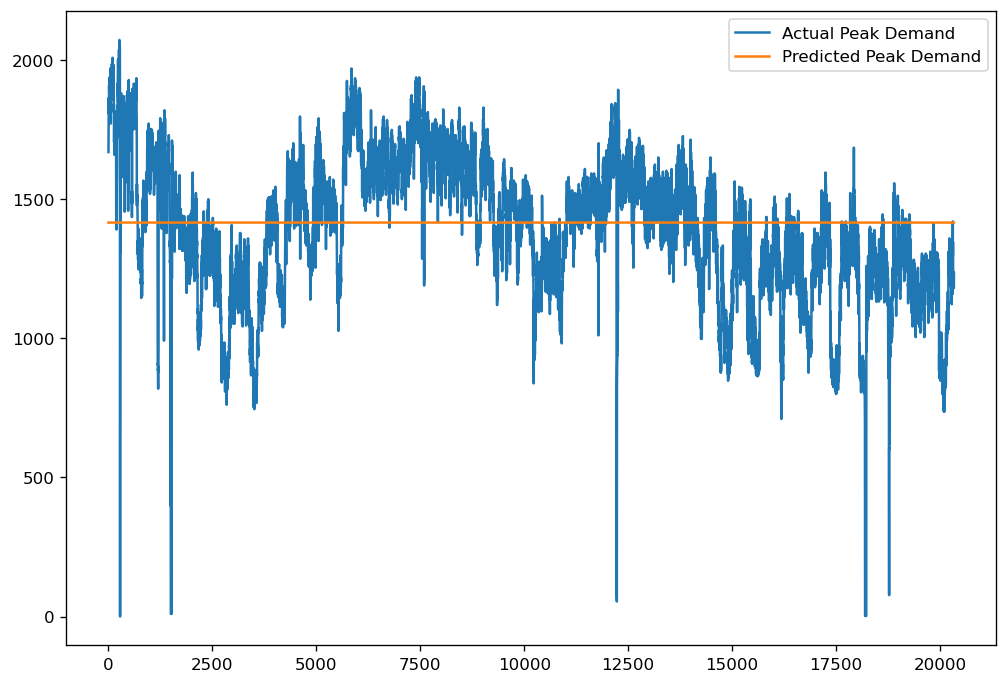

In [69]:
final_df.plot()

<AxesSubplot:>

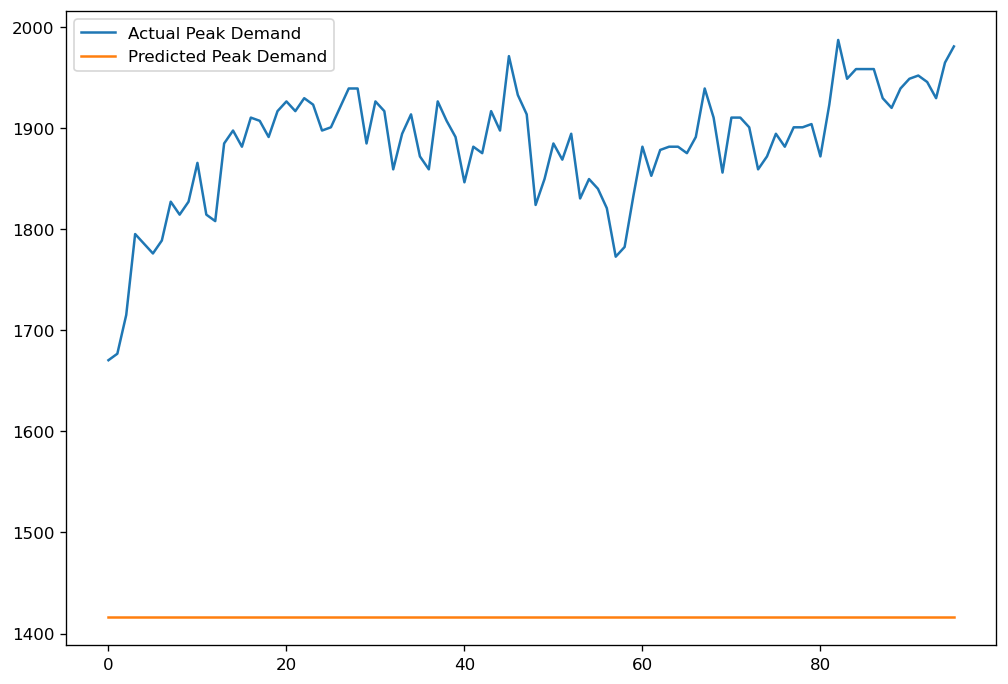

In [70]:
final_df.head(96).plot()

In [71]:
plt.plot(np.arange(0, len(inv_train_y)), inv_train_y, 'g', label="history")
plt.plot(np.arange(len(inv_train_y),  len(inv_train_y) + len(inv_y)), inv_y, marker='.', label="true")
plt.plot(np.arange(len(inv_train_y),  len(inv_train_y) + len(inv_y)), inv_y_pred, 'r', label="prediction")
plt.ylabel('Peak Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();

NameError: name 'inv_train_y' is not defined